0
Nodes: 10000, Edges: 50056, Mixing parameter: 0.1, Number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [01:42<00:00,  2.05s/it]


Average time for flpa: 0.2824 seconds +- 0.0225.
Average time for asyn. lpa: 0.8497 seconds +- 0.1244.
Average time for syn. lpa: 0.9124 seconds +- 0.043.
1
Nodes: 10000, Edges: 50126, Mixing parameter: 0.2, Number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [02:09<00:00,  2.58s/it]


Average time for flpa: 0.3411 seconds +- 0.0192.
Average time for asyn. lpa: 1.0126 seconds +- 0.1531.
Average time for syn. lpa: 1.2261 seconds +- 0.0656.
2
Nodes: 10000, Edges: 49980, Mixing parameter: 0.3, Number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [02:38<00:00,  3.17s/it]


Average time for flpa: 0.4186 seconds +- 0.0171.
Average time for asyn. lpa: 1.252 seconds +- 0.1742.
Average time for syn. lpa: 1.5024 seconds +- 0.0691.
3
Nodes: 10000, Edges: 49847, Mixing parameter: 0.4, Number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [02:50<00:00,  3.41s/it]


Average time for flpa: 0.5519 seconds +- 0.0189.
Average time for asyn. lpa: 1.7823 seconds +- 0.311.
Average time for syn. lpa: 1.0698 seconds +- 0.0351.
4
Nodes: 10000, Edges: 50216, Mixing parameter: 0.5, Number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [03:54<00:00,  4.69s/it]


Average time for flpa: 1.0086 seconds +- 0.5581.
Average time for asyn. lpa: 2.548 seconds +- 1.3221.
Average time for syn. lpa: 1.1286 seconds +- 0.3339.
5
Nodes: 10000, Edges: 49708, Mixing parameter: 0.6, Number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [02:12<00:00,  2.65s/it]


Average time for flpa: 1.0451 seconds +- 0.1634.
Average time for asyn. lpa: 0.8272 seconds +- 0.3709.
Average time for syn. lpa: 0.7808 seconds +- 0.1454.
6
Nodes: 10000, Edges: 49725, Mixing parameter: 0.7, Number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [01:44<00:00,  2.09s/it]


Average time for flpa: 1.1704 seconds +- 0.1547.
Average time for asyn. lpa: 0.4127 seconds +- 0.0717.
Average time for syn. lpa: 0.5105 seconds +- 0.0569.
7
Nodes: 10000, Edges: 50000, Mixing parameter: 0.8, Number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [01:35<00:00,  1.91s/it]


Average time for flpa: 1.0693 seconds +- 0.1334.
Average time for asyn. lpa: 0.3349 seconds +- 0.0435.
Average time for syn. lpa: 0.5039 seconds +- 0.0251.
8
Nodes: 10000, Edges: 50139, Mixing parameter: 0.9, Number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 50/50 [01:45<00:00,  2.10s/it]


Average time for flpa: 1.1603 seconds +- 0.1475.
Average time for asyn. lpa: 0.3542 seconds +- 0.0535.
Average time for syn. lpa: 0.5863 seconds +- 0.0437.


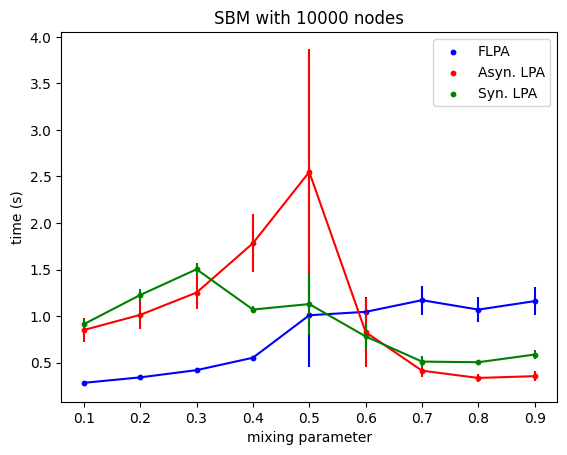

In [1]:
#Plotting the computing times for the LPA asyn., LPA syn., FLPA on a SBM synthetic network
#with increasing mixing parameter and fixed number of nodes, number of groups, average degree.

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import timeit
from tqdm import tqdm

#Creating the SBM networks
def create_sbm(num_nodes, num_groups, avg_degree, mu):
    #Number of nodes per group
    nodes_per_group = num_nodes // num_groups
    sizes = [nodes_per_group] * num_groups
    
    remainder = num_nodes % num_groups
    for i in range(remainder):
        sizes[i] += 1

    p_in = ((1 - mu) * avg_degree) / (nodes_per_group - 1)  #Probability within a group
    p_out = (mu * avg_degree) / (num_nodes - nodes_per_group)  #Probability between groups

    #Creating the probability matrix
    probs = np.full((num_groups, num_groups), p_out)
    np.fill_diagonal(probs, p_in)  
    
    #Generating the SBM network
    G = nx.stochastic_block_model(sizes, probs, seed=42)
    
    return G  

#Parameters
n= 10000
num_groups = 100
avg_degree = 10
mu_v = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#Initializing the variables
medium_t_flpa=[]
medium_t_lpa_asyn=[]
medium_t_lpa_syn=[]
std_t_flpa=[]
std_t_lpa_asyn=[]
std_t_lpa_syn=[]
j=0


for mu in mu_v:
    t_iterations_lpa_asyn=[]
    t_iterations_lpa_syn=[]
    t_iterations_flpa=[]

    G = create_sbm(n, num_groups, avg_degree, mu)
    #Printing parameters of the created network
    print(f"Nodes: {n}, Edges: {G.number_of_edges()}, Mixing parameter: {mu}, Number of groups: {num_groups}")

    for i in tqdm(range(50), desc="Computing"):
        #Computing time for FLPA
        start_time = timeit.default_timer() 
        communities_flpa=list(nx.community.fast_label_propagation_communities(G))
        end_time = timeit.default_timer() 
        t_iteration = end_time - start_time
        t_iterations_flpa.append(t_iteration)

        #Computing time for asyn. LPA
        start_time = timeit.default_timer() 
        communities_lpa_asyn = list(nx.community.asyn_lpa_communities(G))
        end_time = timeit.default_timer() 
        tempo_iterazione = end_time - start_time  
        t_iterations_lpa_asyn.append(tempo_iterazione)

        #Computing time for syn. LPA
        start_time = timeit.default_timer() 
        communities_lpa_syn = list(nx.community.label_propagation_communities(G))
        end_time = timeit.default_timer() 
        tempo_iterazione = end_time - start_time  
        t_iterations_lpa_syn.append(tempo_iterazione)

    #Computing average and standard deviation for each algorithm
    medium_t_flpa.append(np.mean(t_iterations_flpa))
    std_t_flpa.append(np.std(t_iterations_flpa))
    print(f"Average time for flpa: {round(medium_t_flpa[j], 4)} seconds +- {round(std_t_flpa[j], 4)}.")

    medium_t_lpa_asyn.append(np.mean(t_iterations_lpa_asyn))
    std_t_lpa_asyn.append(np.std(t_iterations_lpa_asyn))
    print(f"Average time for asyn. lpa: {round(medium_t_lpa_asyn[j], 4)} seconds +- {round(std_t_lpa_asyn[j], 4)}.")

    medium_t_lpa_syn.append(np.mean(t_iterations_lpa_syn))
    std_t_lpa_syn.append(np.std(t_iterations_lpa_syn))
    print(f"Average time for syn. lpa: {round(medium_t_lpa_syn[j], 4)} seconds +- {round(std_t_lpa_syn[j], 4)}.")
    
    j=j+1

#Plotting the results
plt.scatter(mu_v, medium_t_flpa,color='blue', label='FLPA',s=10)
plt.errorbar(mu_v, medium_t_flpa,yerr=std_t_flpa,color='blue')
plt.scatter(mu_v, medium_t_lpa_asyn,color='red', label='Asyn. LPA',s=10)
plt.errorbar(mu_v, medium_t_lpa_asyn,yerr=std_t_lpa_asyn,color='red')
plt.scatter(mu_v, medium_t_lpa_syn,color='green', label='Syn. LPA', s=10)
plt.errorbar(mu_v, medium_t_lpa_syn,yerr=std_t_lpa_syn,color='green')

plt.xlabel('mixing parameter')
plt.ylabel('time (s)')
plt.title(f'SBM with {n} nodes' )
plt.legend()
plt.savefig("SBM_fixednodes.png")
plt.show()